In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

rentals_df = pd.read_csv("sf_clean.csv")
rentals_df.head()

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600.0,2.0,2.0,(a) in-unit,(d) no pets,(c) multi,(b) protected,7.0
1,3500,550.0,1.0,1.0,(a) in-unit,(a) both,(c) multi,(b) protected,7.0
2,5100,1300.0,2.0,1.0,(a) in-unit,(a) both,(c) multi,(d) no parking,7.0
3,9000,3500.0,3.0,2.5,(a) in-unit,(d) no pets,(c) multi,(b) protected,7.0
4,3100,561.0,1.0,1.0,(c) no laundry,(a) both,(c) multi,(d) no parking,7.0


### Data Dictionary

1. Price: The rental cost of the property, which serves as the target variable.
2. Square Footage (sqft): The total area of the rental property measured in square feet.
3. beds : The number of bedrooms available in the rental unit.
4. bath : The number of bathrooms provided in the rental unit.
5. laundry : Specifies whether the rental includes an in-unit laundry machine, shared laundry access, or no laundry facilities on the    premises.
6. pets : Indicates whether the rental permits cats, dogs, or both types of pets.
7. housing_type: Describes the type of property, such as a multi-family building, a duplex, or a standalone house.
8. parking : Specifies the type of parking offered, including no parking, garage parking, off-street parking, or valet service.
9. hood_district: Identifies the area or district within San Francisco where the rental is located.



In [6]:
rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          989 non-null    int64  
 1   sqft           989 non-null    float64
 2   beds           989 non-null    float64
 3   bath           989 non-null    float64
 4   laundry        989 non-null    object 
 5   pets           989 non-null    object 
 6   housing_type   989 non-null    object 
 7   parking        989 non-null    object 
 8   hood_district  989 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 69.7+ KB


### Value_counter

In [16]:
def value_counter(rentals_df):
    value_series = pd.DataFrame()
    for col in rentals_df.select_dtypes(["object"]).columns:
        print(rentals_df[col].value_counts())
             
value_counter(rentals_df)

laundry
(a) in-unit       488
(b) on-site       370
(c) no laundry    131
Name: count, dtype: int64
pets
(d) no pets    510
(a) both       367
(c) cats        91
(b) dogs        21
Name: count, dtype: int64
housing_type
(c) multi     937
(a) single     40
(b) double     12
Name: count, dtype: int64
parking
(d) no parking    478
(b) protected     439
(c) off-street     38
(a) valet          34
Name: count, dtype: int64


In [19]:
hood_counts  = rentals_df['hood_district'].value_counts()
hood_counts 

hood_district
9.0     332
8.0     207
7.0     123
5.0     106
6.0      62
2.0      51
1.0      50
10.0     33
3.0      14
4.0      11
Name: count, dtype: int64

## EDA process


- The 'hood_district' feature was read as an INTEGER since it should be a categorical feature instead. So it is fixed into object.
   


In [22]:
rentals_df['hood_district'] = rentals_df['hood_district'].astype('object')


In [24]:
rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          989 non-null    int64  
 1   sqft           989 non-null    float64
 2   beds           989 non-null    float64
 3   bath           989 non-null    float64
 4   laundry        989 non-null    object 
 5   pets           989 non-null    object 
 6   housing_type   989 non-null    object 
 7   parking        989 non-null    object 
 8   hood_district  989 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 69.7+ KB


In [31]:
rentals_df.describe()

,price,sqft,beds,bath
count,989.000000,989.000000,989.000000,989.000000
mean,3595.035389,976.765420,1.679474,1.390293
std,1546.222670,474.629798,1.076710,0.562714
min,750.000000,150.000000,0.000000,1.000000
25%,2650.000000,650.000000,1.000000,1.000000
50%,3300.000000,900.000000,2.000000,1.000000
75%,4242.000000,1200.000000,2.000000,2.000000
max,19000.000000,3500.000000,6.000000,4.000000


- There are some rare and expensive apartment pricing over 10k 

<Axes: xlabel='price', ylabel='Count'>

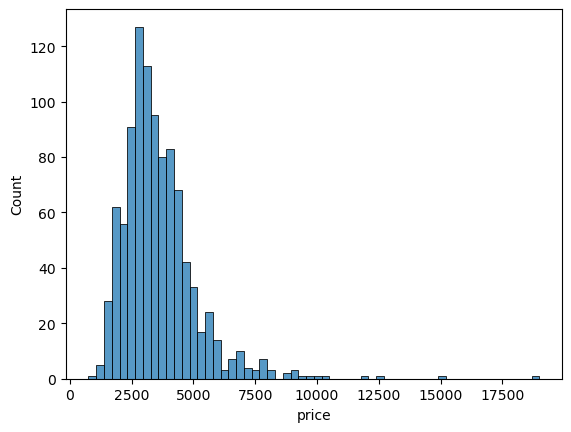

In [34]:
sns.histplot(rentals_df,  x = 'price')

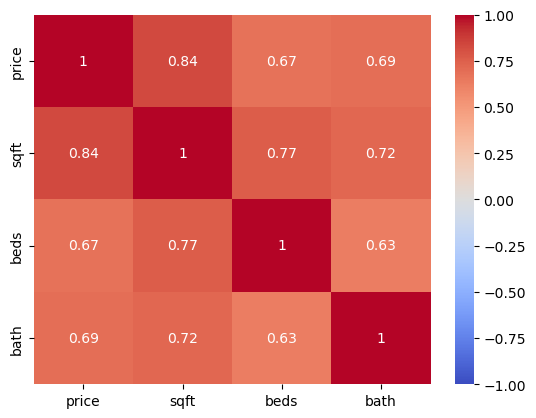

In [36]:
sns.heatmap(rentals_df.corr(numeric_only=True), annot = True , vmin = -1, vmax = 1, cmap = "coolwarm");

### Creating a pairplot using only the numeric columns from the computer dataframe. 


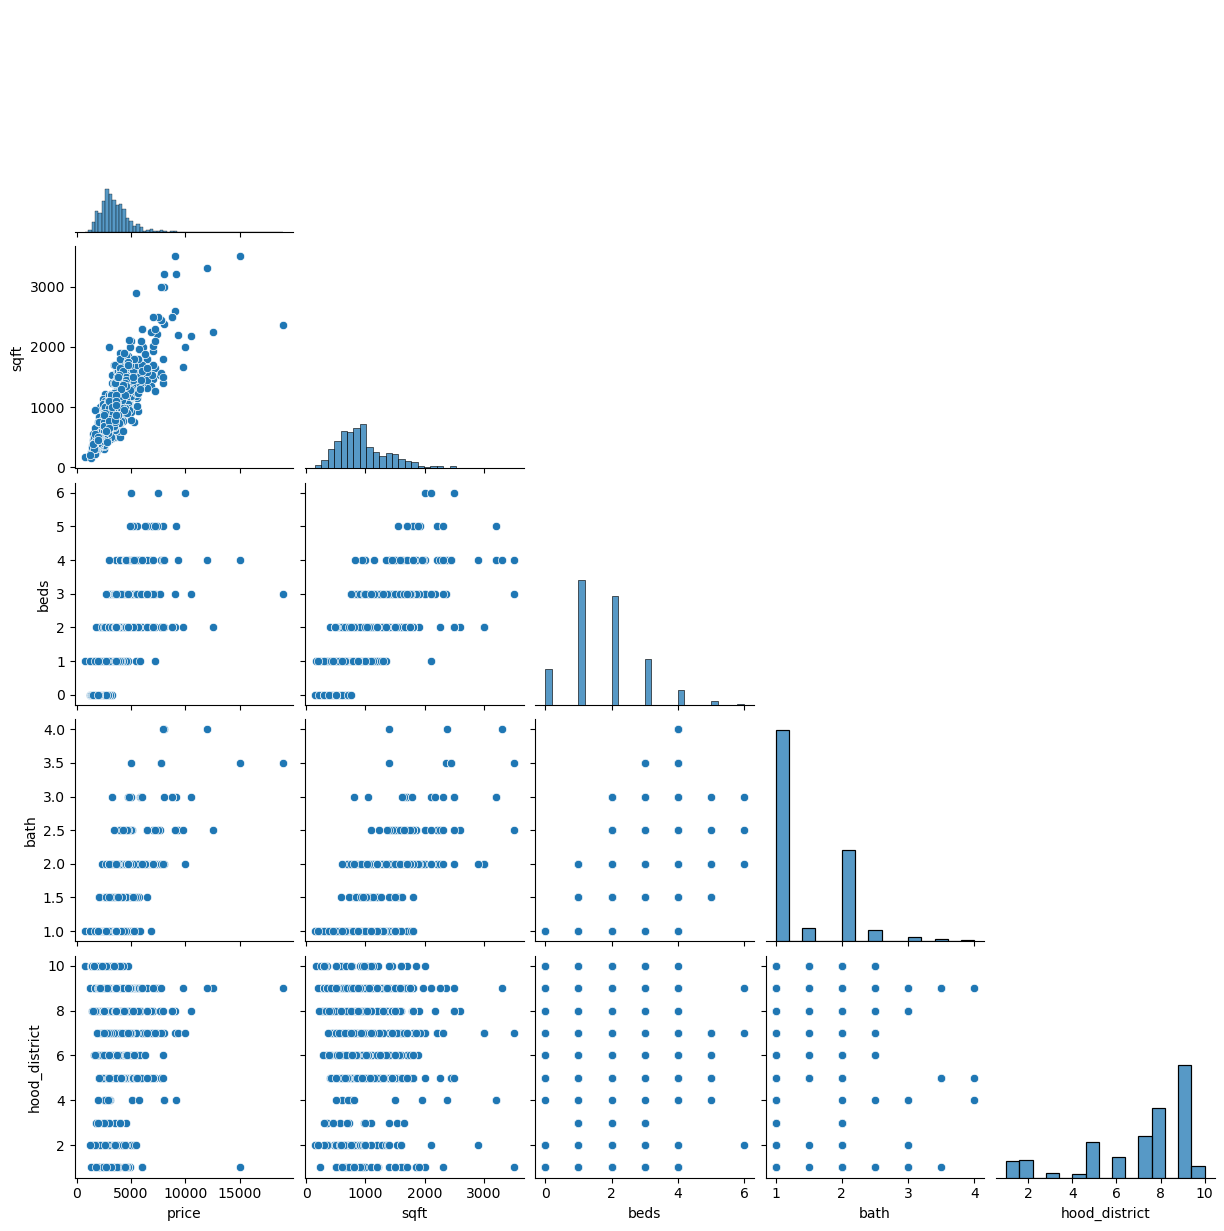

In [156]:
sns.pairplot(rentals_df, corner = True )

In [47]:
def value_counter(rentals_df):
    value_series = pd.DataFrame()
    for col in rentals_df.select_dtypes(["object"]).columns:
        print(rentals_df[col].value_counts())
             
value_counter(rentals_df)

laundry
(a) in-unit       488
(b) on-site       370
(c) no laundry    131
Name: count, dtype: int64
pets
(d) no pets    510
(a) both       367
(c) cats        91
(b) dogs        21
Name: count, dtype: int64
housing_type
(c) multi     937
(a) single     40
(b) double     12
Name: count, dtype: int64
parking
(d) no parking    478
(b) protected     439
(c) off-street     38
(a) valet          34
Name: count, dtype: int64
hood_district
9.0     332
8.0     207
7.0     123
5.0     106
6.0      62
2.0      51
1.0      50
10.0     33
3.0      14
4.0      11
Name: count, dtype: int64


### Try to understand feature_target relationship for categorical features in order to bin


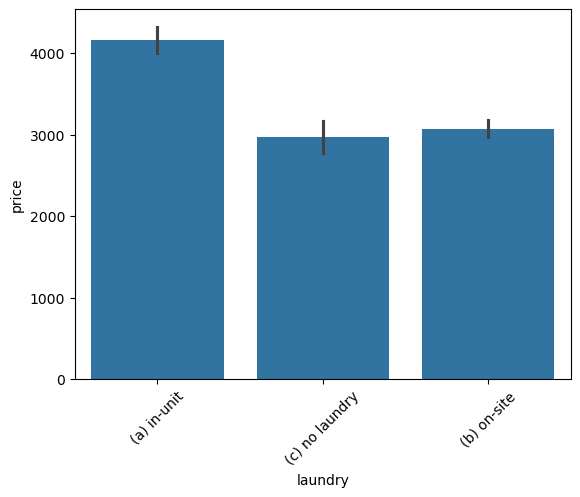

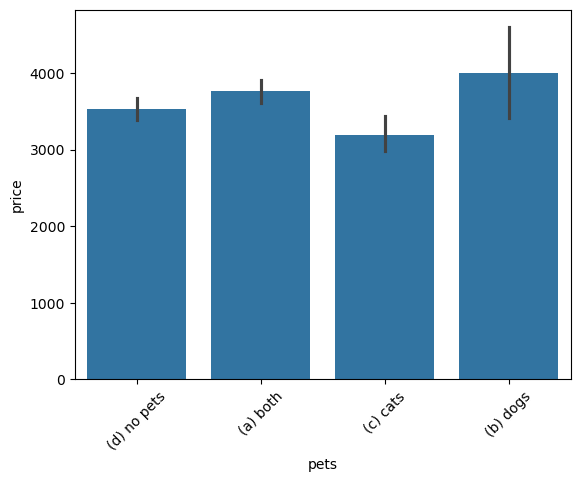

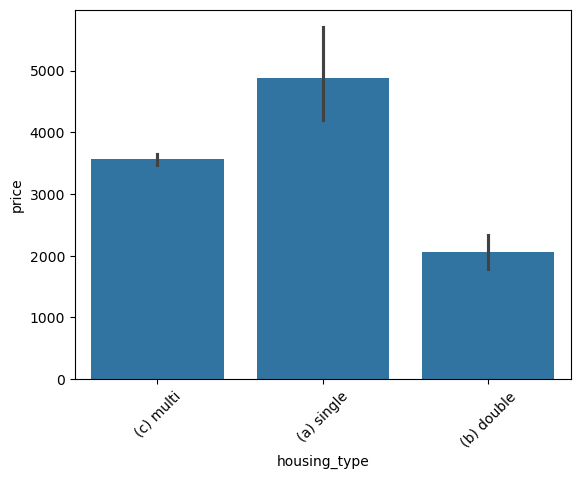

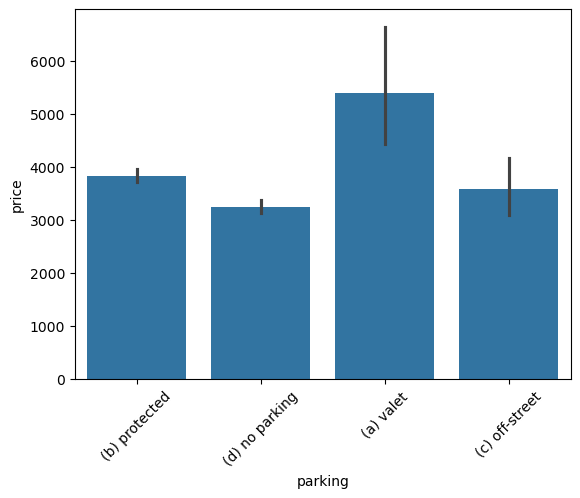

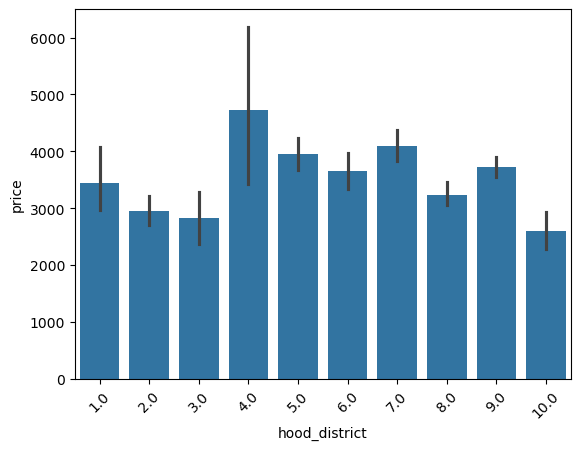

In [50]:
def cat_plotter ( data , target ) :
    for col in data.select_dtypes (['object']).columns :
        sns.barplot( data = data , x = col , y = target )
        plt.xticks (rotation = 45)
        plt.show()

cat_plotter ( rentals_df , 'price' )

(c) multi     937
(a) single     40
(b) double     12

Since we have very few single and double , we can probably bin the multil and double together and 
let the single housing_type stand alone 

### Categorical Mapping 

In [54]:
# Mapping categorical variables
laundry_map = {
    "(a) in-unit": "in_unit",
    "(b) on-site": "not_in_unit",
    "(c) no laundry": "not_in_unit",
}

pet_map = {
    "(a) both": "allows_dogs",
    "(b) dogs": "allows_dogs",
    "(c) cats": "no_dogs",
    "(d) no pets": "no_dogs",
}

housing_type_map = {
    "(a) single": "single",
    "(b) double": "multi",
    "(c) multi": "multi",
}

district_map = {
    1.0: "west",
    2.0: "southwest",
    3.0: "southwest",
    4.0: "central",
    5.0: "central",
    6.0: "central",
    7.0: "marina",
    8.0: "north beach",
    9.0: "FiDi/SOMA",
    10.0: "southwest",
}

In [62]:
# Assigning mapped values to a new DataFrame
eng_df = rentals_df.assign(
    hood_district=rentals_df["hood_district"].map(district_map),
    housing_type=rentals_df["housing_type"].map(housing_type_map),
    pets=rentals_df["pets"].map(pet_map),
    laundry=rentals_df["laundry"].map(laundry_map),
    
    # Squared terms
#    sqft2=rentals_df["sqft"] ** 2,
#    sqft3=rentals_df["sqft"] ** 3,
#    beds2=rentals_df["beds"] ** 2,
#    beds3=rentals_df["beds"] ** 3,
#    bath2=rentals_df["bath"] ** 2,
#    bath3=rentals_df["bath"] ** 3,
#    beds_bath_ratio=rentals_df["beds"] / rentals_df["bath"],
)



eng_df = (
    pd.get_dummies(eng_df, drop_first=True)
       # Convert boolean columns to integers
)


In [64]:
eng_df.head()

,price,sqft,beds,bath,laundry_not_in_unit,pets_no_dogs,housing_type_single,parking_(b) protected,parking_(c) off-street,parking_(d) no parking,hood_district_central,hood_district_marina,hood_district_north beach,hood_district_southwest,hood_district_west
0,6800,1600,2,2,0,1,0,1,0,0,0,1,0,0,0
1,3500,550,1,1,0,0,0,1,0,0,0,1,0,0,0
2,5100,1300,2,1,0,0,0,0,0,1,0,1,0,0,0
3,9000,3500,3,2,0,1,0,1,0,0,0,1,0,0,0
4,3100,561,1,1,1,0,0,0,0,1,0,1,0,0,0


In [60]:
rentals_df.head()

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600.0,2.0,2.0,(a) in-unit,(d) no pets,(c) multi,(b) protected,7.0
1,3500,550.0,1.0,1.0,(a) in-unit,(a) both,(c) multi,(b) protected,7.0
2,5100,1300.0,2.0,1.0,(a) in-unit,(a) both,(c) multi,(d) no parking,7.0
3,9000,3500.0,3.0,2.5,(a) in-unit,(d) no pets,(c) multi,(b) protected,7.0
4,3100,561.0,1.0,1.0,(c) no laundry,(a) both,(c) multi,(d) no parking,7.0


In [66]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

target = "price"
drop_cols = [
    # Example columns to drop (commented for now)
    # "pets_no_dogs",
    # "housing_type_single",
    # "beds_bath_ratio",
]

X = sm.add_constant(eng_df.drop([target] + drop_cols, axis=1))
y = eng_df[target]

# Optional log transformation for the target
# y = np.log(eng_df[target])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [68]:
from sklearn.model_selection import train_test_split, KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error

# Function to perform cross-validation and model training
def cross_val(X, y, n_splits):
    # Create a KFold object for cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=2023)

    # Lists to store validation scores for each fold
    cv_lm_tr_r2s = []
    cv_lm_tr_mae = []
    cv_lm_val_r2s = []
    cv_lm_val_mae = []

    for train_ind, val_ind in kf.split(X, y):
        X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
        X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]

        # Fit the OLS model on training data
        model = sm.OLS(y_train, X_train).fit()

        # Append validation scores to lists
        cv_lm_tr_r2s.append(r2_score(y_train, model.predict(X_train)))
        cv_lm_tr_mae.append(mean_absolute_error(y_train, model.predict(X_train)))
        cv_lm_val_r2s.append(r2_score(y_val, model.predict(X_val)))
        cv_lm_val_mae.append(mean_absolute_error(y_val, model.predict(X_val)))

    # Print validation scores
    print(f"All Training R2s: {[round(x, 3) for x in cv_lm_tr_r2s]}")
    print(f"Training R2s: {round(np.mean(cv_lm_tr_r2s), 3)} +- {round(np.std(cv_lm_tr_r2s), 3)}")

    print(f"All Training MAEs: {[round(x, 3) for x in cv_lm_tr_mae]}")
    print(f"Training MAEs: {round(np.mean(cv_lm_tr_mae), 3)} +- {round(np.std(cv_lm_tr_mae), 3)}")

    print(f"All Validation R2s: {[round(x, 3) for x in cv_lm_val_r2s]}")
    print(f"Cross Val R2s: {round(np.mean(cv_lm_val_r2s), 3)} +- {round(np.std(cv_lm_val_r2s), 3)}")

    print(f"All Validation MAEs: {[round(x, 3) for x in cv_lm_val_mae]}")
    print(f"Cross Val MAEs: {round(np.mean(cv_lm_val_mae), 3)} +- {round(np.std(cv_lm_val_mae), 3)}")

    return model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Perform cross-validation and train the model
model = cross_val(X_train, y_train, 5)

All Training R2s: [0.748, 0.755, 0.744, 0.783, 0.75]
Training R2s: 0.756 +- 0.014
All Training MAEs: [498.985, 498.08, 479.466, 478.279, 508.794]
Training MAEs: 492.721 +- 11.921
All Validation R2s: [0.781, 0.741, 0.77, 0.673, 0.767]
Cross Val R2s: 0.746 +- 0.039
All Validation MAEs: [489.39, 497.826, 533.221, 530.691, 456.599]
Cross Val MAEs: 501.546 +- 28.406


In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     132.7
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.28e-175
Time:                        21:22:23   Log-Likelihood:                -5138.8
No. Observations:                 633   AIC:                         1.031e+04
Df Residuals:                     618   BIC:                         1.037e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2364.3589    214.417     11.027      0.000    1943.284    2785.434
sqft                          1.9830      0.122     16.289      0.000       1.744       2.222
beds                        148.8010     48.243      3.084      0.002      54.060     243.542
bath                        381.5312     85.428      4.466      0.000     213.767     549.295
laundry_not_in_unit        -273.8442     77.871     -3.517      0.000    -426.768    -120.921
pets_no_dogs                 49.6189     70.200      0.707      0.480     -88.241     187.479
housing_type_single        -162.9968    176.030     -0.926      0.355    -508.687     182.693
parking_(b) protected     -1392.9284    183.731     -7.581      0.000   -1753.741   -1032.116
parking_(c) off-street    -1101.7344    261.097     -4.220      0.000   -1614.480    -588.989
parking_(d) no parking    -1512.4565    189.479     -7.982      0.000   -1884.557   -1140.356
hood_district_central       187.2612    100.195      1.869      0.062      -9.502     384.024
hood_district_marina        345.7842    116.611      2.965      0.003     116.783     574.785
hood_district_north beach   102.4616     97.621      1.050      0.294     -89.248     294.172
hood_district_southwest    -462.2429    128.903     -3.586      0.000    -715.384    -209.102
hood_district_west         -142.1636    156.915     -0.906      0.365    -450.314     165.987
==============================================================================
Omnibus:                      595.900   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49483.263
Skew:                           3.834   Prob(JB):                         0.00
Kurtosis:                      45.630   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- SINCE pets_no_dogs and housing_type_single stand out from Pvalue 
- also likely to cause overfitting


In [86]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

target = "price"
drop_cols = [
    # Example columns to drop (commented for now)
     "pets_no_dogs",
     "housing_type_single",
    # "beds_bath_ratio",
]

X = sm.add_constant(eng_df.drop([target] + drop_cols, axis=1))
# y = eng_df[target]

# Optional log transformation for the target
y = np.log(eng_df[target])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

Once the model learns to predict those log numbers, you can transform the results back to the original scale (by applying exp()).

In [88]:
from sklearn.model_selection import train_test_split, KFold
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error

# Function to perform cross-validation and model training
def cross_val(X, y, n_splits):
    # Create a KFold object for cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=2023)

    # Lists to store validation scores for each fold
    cv_lm_tr_r2s = []
    cv_lm_tr_mae = []
    cv_lm_val_r2s = []
    cv_lm_val_mae = []

    for train_ind, val_ind in kf.split(X, y):
        X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
        X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]

        # Fit the OLS model on training data
        model = sm.OLS(y_train, X_train).fit()

        # Append validation scores to lists
        cv_lm_tr_r2s.append(r2_score(y_train, model.predict(X_train)))
        cv_lm_tr_mae.append(mean_absolute_error(y_train, model.predict(X_train)))
        cv_lm_val_r2s.append(r2_score(y_val, model.predict(X_val)))
        cv_lm_val_mae.append(mean_absolute_error(y_val, model.predict(X_val)))

    # Print validation scores
    print(f"All Training R2s: {[round(x, 3) for x in cv_lm_tr_r2s]}")
    print(f"Training R2s: {round(np.mean(cv_lm_tr_r2s), 3)} +- {round(np.std(cv_lm_tr_r2s), 3)}")

    print(f"All Training MAEs: {[round(x, 3) for x in cv_lm_tr_mae]}")
    print(f"Training MAEs: {round(np.mean(cv_lm_tr_mae), 3)} +- {round(np.std(cv_lm_tr_mae), 3)}")

    print(f"All Validation R2s: {[round(x, 3) for x in cv_lm_val_r2s]}")
    print(f"Cross Val R2s: {round(np.mean(cv_lm_val_r2s), 3)} +- {round(np.std(cv_lm_val_r2s), 3)}")

    print(f"All Validation MAEs: {[round(x, 3) for x in cv_lm_val_mae]}")
    print(f"Cross Val MAEs: {round(np.mean(cv_lm_val_mae), 3)} +- {round(np.std(cv_lm_val_mae), 3)}")

    return model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Perform cross-validation and train the model
model = cross_val(X_train, y_train, 5)

All Training R2s: [0.812, 0.811, 0.801, 0.812, 0.804]
Training R2s: 0.808 +- 0.005
All Training MAEs: [0.128, 0.132, 0.132, 0.131, 0.133]
Training MAEs: 0.131 +- 0.002
All Validation R2s: [0.787, 0.785, 0.818, 0.781, 0.81]
Cross Val R2s: 0.796 +- 0.015
All Validation MAEs: [0.146, 0.129, 0.132, 0.136, 0.127]
Cross Val MAEs: 0.134 +- 0.007


-The average cross-validation R2 of 0.796 suggests that this generalizes well to unseen data, although there is some variability (0.015).

-Seems to be slightly overfitting the training data, as the training R2 is slightly higher than the cross-validation R2. However, the difference is not significant.

-On average, 0.134 units away from the true values.

In [90]:
def residual_analysis_plots(model):
    
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    
    predictions = model.predict()
    residuals = model.resid
    
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0], alpha=.3)
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")   


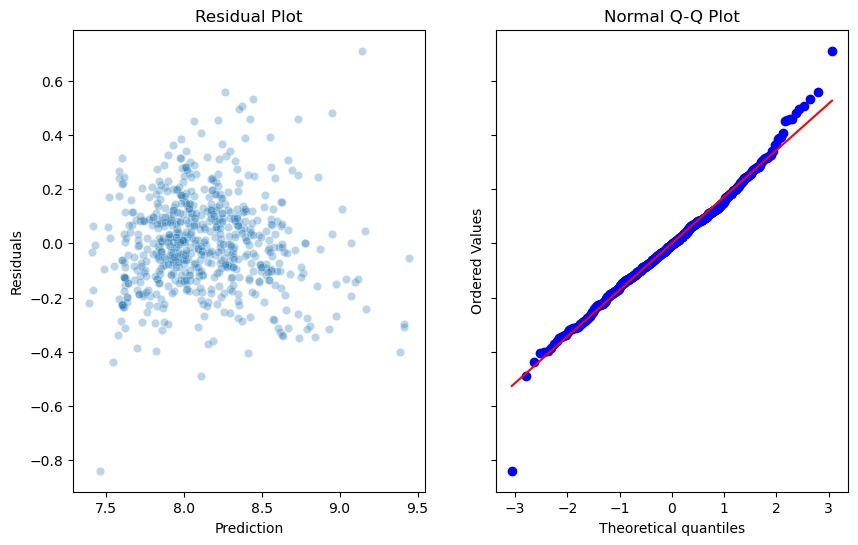

In [92]:
residual_analysis_plots(model)

#### VIF

VIF ≈ 1: No multicollinearity.
1 < VIF < 5: Moderate multicollinearity (acceptable).
VIF > 8: High multicollinearity (problematic). Over threshold 

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

pd.Series(
    [vif(X.values , i )  for i in range (X.shape[1])] ,
    index = X.columns
)


const                        43.386185
sqft                          3.203718
beds                          2.685583
bath                          2.025061
laundry_not_in_unit           1.379397
parking_(b) protected         8.119353
parking_(c) off-street        2.223513
parking_(d) no parking        8.777061
hood_district_central         1.404615
hood_district_marina          1.363295
hood_district_north beach     1.435016
hood_district_southwest       1.285736
hood_district_west            1.189619
dtype: float64

In [99]:
influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head()

,dfb_const,dfb_sqft,dfb_beds,dfb_bath,dfb_laundry_not_in_unit,dfb_parking_(b) protected,dfb_parking_(c) off-street,dfb_parking_(d) no parking,dfb_hood_district_central,dfb_hood_district_marina,dfb_hood_district_north beach,dfb_hood_district_southwest,dfb_hood_district_west,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
226,-0.034543,0.056183,-0.113033,0.052808,0.012922,-0.008691,0.009320,0.008321,0.039852,0.025048,0.024963,0.027635,0.019094,0.001386,-0.752660,0.030823,-0.134226,-0.752397,-0.134179
391,-0.002753,-0.003616,0.011022,0.001128,-0.014100,0.003933,0.004045,-0.001935,-0.032662,0.003126,0.008115,0.005461,0.004792,0.000221,-0.471937,0.012740,-0.053610,-0.471641,-0.053576
293,-0.003683,0.005322,-0.010714,0.002769,0.014913,0.001905,0.084081,-0.000942,-0.009637,-0.021600,0.030876,-0.003299,-0.005945,0.001311,0.537662,0.055662,0.130534,0.537353,0.130459
648,0.016494,-0.005657,-0.018776,-0.006193,-0.049580,-0.002298,-0.001045,0.011242,0.064255,0.013052,0.000341,0.009084,0.010924,0.000734,0.767114,0.015948,0.097657,0.766859,0.097624
366,-0.000048,0.000037,0.002386,-0.001722,0.002308,-0.000283,-0.000492,0.000153,-0.000976,-0.000992,0.003919,-0.001111,-0.000876,0.000005,0.072854,0.011066,0.007707,0.072795,0.007700


In [101]:
inf_summary_df["cooks_d"].sort_values(ascending=False)

253    8.259018e-02
56     4.049579e-02
602    3.891627e-02
598    2.886367e-02
863    2.687522e-02
           ...     
373    1.754602e-07
509    1.602983e-07
210    8.824512e-08
722    5.957661e-08
738    1.498837e-09
Name: cooks_d, Length: 633, dtype: float64

In [103]:
X.loc[253]

const                           1.0
sqft                         2358.0
beds                            3.0
bath                            3.0
laundry_not_in_unit             0.0
parking_(b) protected           0.0
parking_(c) off-street          0.0
parking_(d) no parking          0.0
hood_district_central           0.0
hood_district_marina            0.0
hood_district_north beach       0.0
hood_district_southwest         0.0
hood_district_west              0.0
Name: 253, dtype: float64

In [105]:
y.loc[253]

9.852194258148577

In [107]:
np.exp(y.loc[253]) # log 

18999.999999999993

- Biggest potential outlier is 19000

## Final Model Fit 

In [111]:
final_model = sm.OLS(y, X).fit()

final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     334.8
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:58:14   Log-Likelihood:                 369.31
No. Observations:                 989   AIC:                            -712.6
Df Residuals:                     976   BIC:                            -649.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         7.7658      0.035    221.130      0.000       7.697       7.835
sqft                          0.0004   2.01e-05     19.606      0.000       0.000       0.000
beds                          0.1036      0.008     12.760      0.000       0.088       0.120
bath                          0.0390      0.014      2.731      0.006       0.011       0.067
laundry_not_in_unit          -0.0833      0.013     -6.652      0.000      -0.108      -0.059
parking_(b) protected        -0.1780      0.031     -5.822      0.000      -0.238      -0.118
parking_(c) off-street       -0.1956      0.041     -4.728      0.000      -0.277      -0.114
parking_(d) no parking       -0.2569      0.032     -8.128      0.000      -0.319      -0.195
hood_district_central         0.0246      0.016      1.497      0.135      -0.008       0.057
hood_district_marina          0.0797      0.019      4.224      0.000       0.043       0.117
hood_district_north beach    -0.0200      0.016     -1.276      0.202      -0.051       0.011
hood_district_southwest      -0.1813      0.020     -8.958      0.000      -0.221      -0.142
hood_district_west           -0.0746      0.027     -2.811      0.005      -0.127      -0.023
==============================================================================
Omnibus:                       22.059   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.897
Skew:                           0.078   Prob(JB):                     4.84e-10
Kurtosis:                       4.008   Cond. No.                     1.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
print(mae(np.exp(y_test) , np.exp(final_model.predict(X_test))))#Reversing the log transformation (np.exp returns the original values). 
print(f"Test R2: {r2(y_test, final_model.predict(X_test))}")

433.1995377873103
Test R2: 0.7939283611190202


## Scaling Data

In [129]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_tr = std.fit_transform(X.values)
X_te = std.transform(X_test.values)

### Ridge

Ridge Regression:

-Feature Selection: Ridge regression shrinks coefficients towards zero but doesn't necessarily set them to zero. This means all features are included in the model, but their impact is reduced.

-Coefficient Interpretation: The coefficients in the Ridge model indicate the relative importance of each feature, but they might be slightly biased due to the shrinkage.

In [131]:
from sklearn.linear_model import RidgeCV

n_alphas = 100
alphas = 10 ** np.linspace(-3, 3, n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=5)

ridge_model.fit(X_tr, y)
print(f"Cross Val R2: {ridge_model.score(X_tr, y)}")
print(f"Cross Val MAE: {mae(np.exp(y), np.exp(ridge_model.predict(X_tr)))}")
print(f"Alpha: {ridge_model.alpha_}")

Cross Val R2: 0.8045471923681918
Cross Val MAE: 483.3268502678909
Alpha: 2.848035868435802


In [133]:
list(zip(X.columns, ridge_model.coef_))

[('const', 0.0),
 ('sqft', 0.18646547705538002),
 ('beds', 0.11119084494827658),
 ('bath', 0.021439397890659736),
 ('laundry_not_in_unit', -0.041864733632180996),
 ('parking_(b) protected', -0.08355384454173038),
 ('parking_(c) off-street', -0.0355719872170661),
 ('parking_(d) no parking', -0.12329362572450568),
 ('hood_district_central', 0.009265560034414465),
 ('hood_district_marina', 0.026120495188356522),
 ('hood_district_north beach', -0.008266398413189843),
 ('hood_district_southwest', -0.05418415382076281),
 ('hood_district_west', -0.016379729349057147)]

## Lasso

Lasso Regression:

- Feature Selection: Lasso regression can set some coefficients to exactly zero, effectively eliminating those features from the model. This is a form of feature selection.

- Coefficient Interpretation: The non-zero coefficients in the Lasso model represent the most important features. The magnitude of the coefficients indicates the strength of their impact on the target variable.

In [174]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = 10 ** np.linspace(-2, 3, n_alphas)

lasso_model = LassoCV(alphas=alphas, cv=5)

lasso_model.fit(X_tr, y)

print(f"Cross Val R2: {lasso_model.score(X_tr, y)}")
print(f"Cross Val MAE: {mae(np.exp(y), np.exp(lasso_model.predict(X_tr)))}")
print(f"Alpha: {lasso_model.alpha_}")

Cross Val R2: 0.7935988985541174
Cross Val MAE: 496.1102755461162
Alpha: 0.01


In [146]:
list(zip(X.columns, lasso_model.coef_))

[('const', 0.0),
 ('sqft', 0.19534027239161814),
 ('beds', 0.09824220538756936),
 ('bath', 0.019548580484348713),
 ('laundry_not_in_unit', -0.0402773495341586),
 ('parking_(b) protected', -0.0),
 ('parking_(c) off-street', -0.0),
 ('parking_(d) no parking', -0.034792160157383206),
 ('hood_district_central', 0.0),
 ('hood_district_marina', 0.014347417277744395),
 ('hood_district_north beach', -0.002747974407785368),
 ('hood_district_southwest', -0.04775278266761139),
 ('hood_district_west', -0.008720666194562004)]

- Positive Coefficients: Features like sqft, beds, bath, hood_district_marina have positive coefficients, indicating that increasing these features tends to increase the predicted price.

- Negative Coefficients: Features like laundry_not_in_unit, parking_(b) protected, parking_(c) off-street, parking_(d) no parking, hood_district_southwest, and hood_district_west have negative coefficients,
suggesting that increasing these features tends to decrease the predicted price.

- In the case of 'hood_district_central', 0.0, this means that the model has found no significant relationship between properties located in the "central" district and their prices. 

### ElasticNet

In [150]:
from sklearn.linear_model import ElasticNetCV

alphas = 10 ** np.linspace(-2, 3, 200)
l1_ratios = np.linspace(.01, 1, 100)

enet_model = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5)

enet_model.fit(X_tr, y)

print(f"Cross Val R2: {enet_model.score(X_tr, y)}")
print(f"Cross Val MAE: {mae(np.exp(y), np.exp(enet_model.predict(X_tr)))}")
print(f"Alpha: {enet_model.alpha_}")
print(f"L1_Ratio: {enet_model.l1_ratio_}")  # Alpha: 0.01 is chosen for regularization.

Cross Val R2: 0.8042779781218352
Cross Val MAE: 484.0454454761578
Alpha: 0.01
L1_Ratio: 0.01


L1_ratio determines how much the model prioritizes shrinking coefficients to zero (feature selection) vs. shrinking them all towards zero (reducing overall complexity). A lower L1_ratio (like 0.01 here) emphasizes L2 regularization, keeping more features in the model but reducing their impact.

## Final Model Testing

In [153]:
print(f"Test MAE: {mae(np.exp(y_test), np.exp(ridge_model.predict(X_te)))}")
print(f"Test R2: {r2(y_test, ridge_model.predict(X_te))}")

Test MAE: 433.93317323077804
Test R2: 0.7939889429281246


In [160]:
print(f"Test MAE: {mae(np.exp(y_test), np.exp(lasso_model.predict(X_te)))}")
print(f"Test R2: {r2(y_test, lasso_model.predict(X_te))}")

Test MAE: 437.1818269022074
Test R2: 0.7917643776873509


- Test MAE:
Ridge model gives a slightly better Test MAE (433.93 vs. 437.18). This means Ridge is producing marginally more accurate predictions on average.
- Test R²:
Ridge also has a slightly better Test R² (0.79399 vs. 0.79176), indicating that it explains slightly more variance in the test data compared to Lasso.
